In [136]:
%reset
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.stats
import mne
from mne.time_frequency import tfr_morlet
from mne.stats import permutation_cluster_1samp_test
import gc
import os
import copy
import pickle
from os.path import exists
import mne
import numpy as np
from mne import create_info
from auxiliary import AuxFuncs
from IPython.utils import io
import yasa
import seaborn as sns

gc.collect()

11

In [137]:
data_dir = 'C:\BigFiles\OmissionExpOutput\py\import'
import_type = "eventDetectionElectrodes_plainEEGLAB"
output_dir_name = 'spindleDetection'

In [138]:
import_path = f'{data_dir}\\{import_type}.pkl'

with open(import_path, "rb") as file:
    [allsubsdata_perFile, configu] = pickle.load(file)

fig_output_dir = f"{configu['outputs_dir_path']}/{output_dir_name}"
if not os.path.exists(fig_output_dir):
    os.mkdir(fig_output_dir)

09-Jan-23 16:32:11 | WARNING | Hypnogram is SHORTER than data by 24.74 seconds. Padding hypnogram with last value to match data.size.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


       Start      Peak       End  Duration   Amplitude        RMS  AbsPower  \
0   2455.406  2455.994  2456.238     0.832  121.873335  24.159822  2.715876   
1   2482.586  2482.874  2483.152     0.566   57.545205  13.041140  2.298696   
2   2512.574  2512.690  2513.282     0.708   74.000853  17.435682  2.446894   
3   2624.508  2624.818  2625.102     0.594   89.905639  18.944297  2.532210   
4   2627.050  2627.268  2627.562     0.512  102.444623  22.880264  2.807907   
5   2703.880  2704.454  2704.976     1.096  107.490415  18.459069  2.061358   
6   2756.056  2756.322  2757.146     1.090   80.786458  16.520862  2.308462   
7   2765.860  2765.976  2766.914     1.054   64.335886  15.540957  2.286889   
8   3061.486  3062.032  3062.296     0.810  100.267190  23.072670  2.688490   
9   3130.696  3130.830  3131.340     0.644   75.273934  16.559636  2.231318   
10  3197.910  3198.324  3198.602     0.692   53.396298  11.757643  2.234668   
11  3243.520  3243.882  3244.104     0.584   58.1556

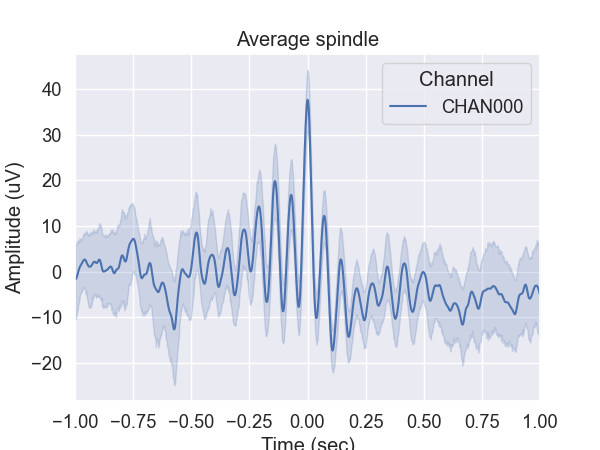

interactive(children=(IntSlider(value=0, description='Epoch:', layout=Layout(align_items='center', justify_con…

<function yasa.detection._DetectionResults.plot_detection.<locals>.update(epoch, amplitude, channel, win_size, filt)>

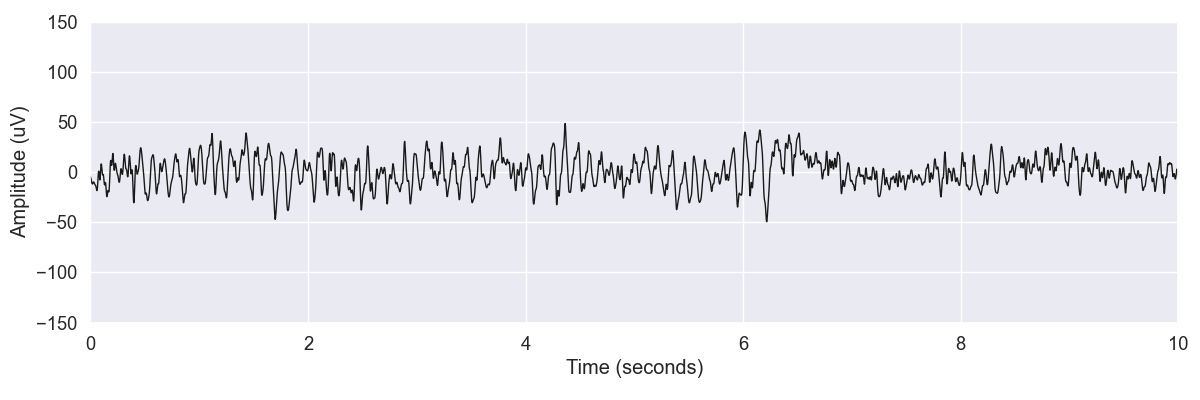

In [139]:
%matplotlib ipympl
sub = '08'
datafile = 2 
id = f"{sub}_{datafile}"

datafile_data = allsubsdata_perFile[id]['data'] ## shape (electrode, time)
datafile_scoring = allsubsdata_perFile[id]['scoring'] ## shape (time/sampling/30)
datafile_data_cz = datafile_data[1,:]
# if 2 not in datafile_scoring or 3 not in datafile_scoring:
#     continue

exmp_scoring_upsampled = yasa.hypno_upsample_to_data(datafile_scoring, 1/30, datafile_data_cz, sf_data=configu['sample_freq'], verbose=True)
sp = yasa.spindles_detect(datafile_data_cz,sf=configu['sample_freq'], hypno = exmp_scoring_upsampled,include=[2, 3])
print(sp.summary())
sp.plot_average(center='Peak',time_before = 1,time_after = 1)
plt.show()
%matplotlib widget
sp.plot_detection()

09-Jan-23 16:33:41 | WARNING | Hypnogram is SHORTER than data by 24.74 seconds. Padding hypnogram with last value to match data.size.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


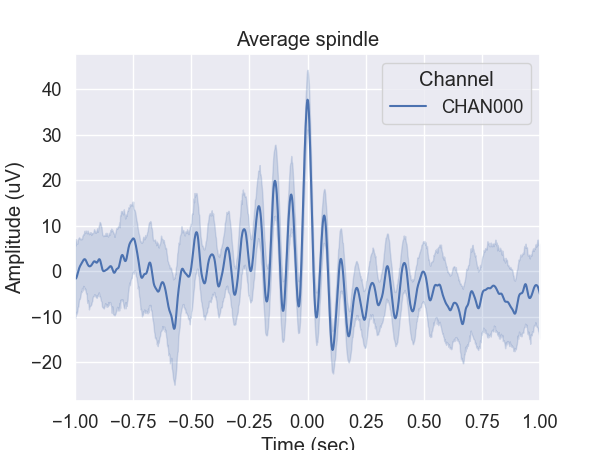

09-Jan-23 16:33:54 | WARNING | Hypnogram is SHORTER than data by 12.59 seconds. Padding hypnogram with last value to match data.size.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


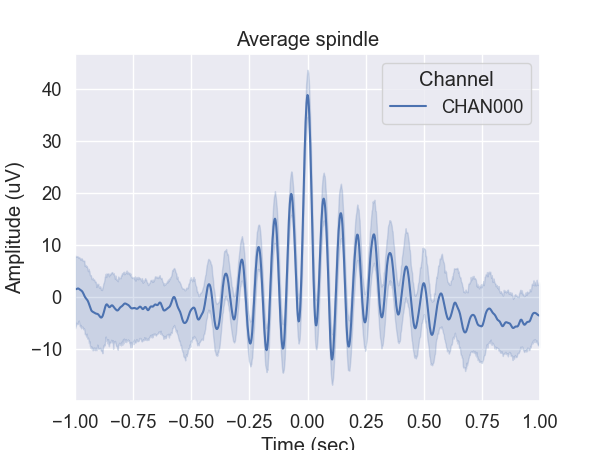

09-Jan-23 16:34:08 | WARNING | Hypnogram is SHORTER than data by 3.62 seconds. Padding hypnogram with last value to match data.size.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


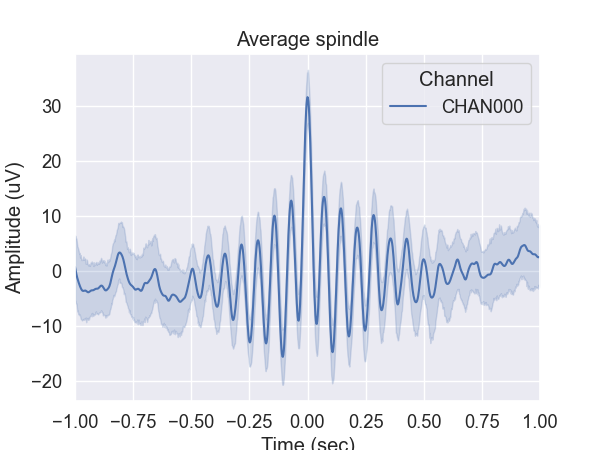

09-Jan-23 16:34:19 | WARNING | Hypnogram is SHORTER than data by 7.96 seconds. Padding hypnogram with last value to match data.size.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


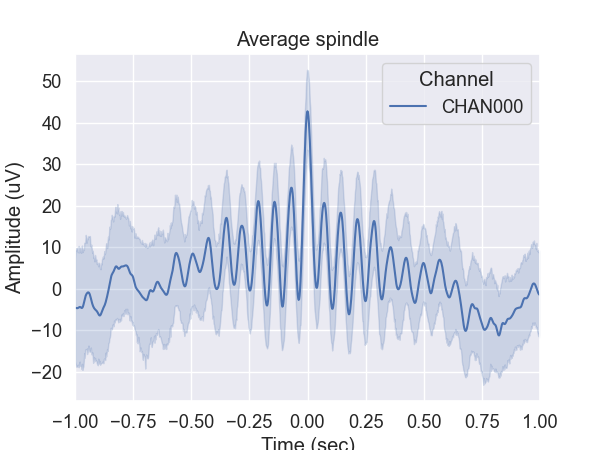

09-Jan-23 16:34:28 | WARNING | Hypnogram is SHORTER than data by 20.42 seconds. Padding hypnogram with last value to match data.size.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [141]:
yasa_output_dir = f"{configu['outputs_dir_path']}/{output_dir_name}/yasa"
if not os.path.exists(yasa_output_dir):
    os.mkdir(yasa_output_dir)

for id in allsubsdata_perFile:
    datafile_data = allsubsdata_perFile[id]['data'] ## shape (electrode, time)
    datafile_scoring = allsubsdata_perFile[id]['scoring'] ## shape (time/sampling/30)
    datafile_data_cz = datafile_data[1,:]
    if 2 not in datafile_scoring or 3 not in datafile_scoring:
        continue

    exmp_scoring_upsampled = yasa.hypno_upsample_to_data(datafile_scoring, 1/30, datafile_data_cz, sf_data=configu['sample_freq'], verbose=True)
    sp = yasa.spindles_detect(datafile_data_cz,sf=configu['sample_freq'], hypno = exmp_scoring_upsampled,include=[2, 3])
    #print(sp.summary())
    summary_df  = sp.summary()
    summary_df.to_csv(f"{yasa_output_dir}\\{allsubsdata_perFile[id]['subnum']}_{allsubsdata_perFile[id]['filenum']}_yasaSpindles.csv")
    sp.plot_average(center='Peak',time_before = 1,time_after = 1)
    #plt.show()